In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec
import warnings

In [2]:
# CSV 파일별 직관적인 변수명 추천
# OTT 서비스 관련 데이터프레임명

# 계속 이용 의향 데이터
df_continue_intent = pd.read_csv('./data/ott/OTT_유료서비스_계속_이용_의향__서비스별_20250413203427.csv', encoding='cp949')

# 이용 기간 데이터
df_usage_period = pd.read_csv('./data/ott/OTT_유료서비스_이용기간__전체_20250413203445.csv', encoding='cp949')

# 전체 이용 경험 데이터
df_usage_exp = pd.read_csv('./data/ott/OTT_이용_경험_여부_20250413203126.csv', encoding='cp949')

# 서비스별 이용 경험 데이터
df_service_exp = pd.read_csv('./data/ott/OTT_이용_경험_여부_서비스별_20250413203230.csv', encoding='cp949')

# 이용 빈도 데이터
df_usage_freq = pd.read_csv('./data/ott/OTT_이용_빈도_20250413203151.csv', encoding='cp949')

In [3]:
df_continue_intent.head()

,구분별(1),구분별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10,2023.11,2023.12,2023.13,2023.14
0,구분별(1),구분별(2),사례수 (가구원),웨이브 (%),티빙 (%),U+모바일 TV (%),왓챠 (%),카카오TV (%),유튜브 (%),넷플릭스 (%),아프리카 TV (%),디즈니플러스 (%),쿠팡플레이 (%),애플TV+ (%),기타 (%),이용의향 모두 없음 (%),유료서비스 비이용 (%)
1,전체,소계,29222,2.1,2.7,0.2,0.9,0.1,6.9,17.8,0.1,2.0,1.9,0.2,0.0,1.8,75.0
2,지역별,서울,5389,3.2,2.9,0.1,1.2,0.0,10.4,23.7,0.2,3.3,2.4,0.2,0.1,2.2,67.2
3,지역별,부산,1871,0.7,2.2,0.1,0.5,0.0,5.4,15.9,0.0,1.3,0.5,0.0,0.0,1.9,78.4
4,지역별,대구,1329,0.6,1.2,0.3,0.2,0.0,2.7,12.7,0.0,1.4,0.9,0.1,0.0,1.5,82.0


In [4]:
df_usage_period.head()

,구분별(1),구분별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7
0,구분별(1),구분별(2),사례수 (가구원),3개월 미만 (%),3개월-6개월 미만 (%),6개월-1년 미만 (%),1년-1년 6개월 미만 (%),1년 6개월-2년 미만 (%),2년 이상 (%),비이용 (%)
1,전체,소계,29222,0.5,1.3,4.7,6.8,4.8,6.9,75.0
2,지역별,서울,5389,0.6,1.0,5.3,9.1,6.1,10.7,67.2
3,지역별,부산,1871,0.1,1.0,4.2,5.7,4.7,5.9,78.4
4,지역별,대구,1329,0.1,0.7,2.4,4.0,4.6,6.3,82.0


In [5]:
df_usage_exp.head()

,구분별(1),구분별(2),2023,2023.1,2023.2
0,구분별(1),구분별(2),사례수 (가구원),이용 경험 있음 (%),이용 경험 없음 (%)
1,전체,소계,29222,66.8,33.2
2,지역별,서울,5389,72.5,27.5
3,지역별,부산,1871,73.6,26.4
4,지역별,대구,1329,68.8,31.2


In [6]:
df_service_exp.head()

,구분별(1),구분별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10,2023.11,2023.12,2023.13,2023.14
0,구분별(1),구분별(2),사례수 (가구원),유튜브 (%),넷플릭스 (%),웨이브 (%),티빙 (%),왓챠 (%),NOW (%),U+모바일TV (%),카카오TV (%),아프리카TV (%),디즈니플러스 (%),쿠팡플레이 (%),애플TV+ (%),기타 (%),OTT비이용 (%)
1,전체,소계,29222,62.2,31.6,4.7,6.0,2.2,0.8,0.8,1.1,1.3,4.2,4.2,0.4,0.1,33.2
2,지역별,서울,5389,67.4,36.3,6.6,5.9,1.9,0.6,0.7,0.4,1.2,5.4,4.5,0.4,0.2,27.5
3,지역별,부산,1871,69.3,31.4,3.1,5.9,1.1,0.3,0.2,0.4,1.8,2.5,2.5,0.1,0.0,26.4
4,지역별,대구,1329,65.2,28.1,2.6,4.5,2.6,0.8,0.3,0.2,1.4,5.4,2.2,0.3,0.0,31.2


In [7]:
df_usage_freq.head()

,구분별(1),구분별(2),2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6
0,구분별(1),구분별(2),사례수 (가구원),주 1일 미만 (%),주 1-2일 (%),주 3-4일 (%),주 5-6일 (%),주 7일 (%),OTT 비이용 (%)
1,전체,소계,29222,2.2,11.4,19.2,16.0,18.0,33.2
2,지역별,서울,5389,2.6,13.5,22.8,18.8,14.7,27.5
3,지역별,부산,1871,2.9,7.9,22.6,14.2,26.0,26.4
4,지역별,대구,1329,2.2,11.2,18.5,20.7,16.2,31.2


# OTT 서비스 데이터 분석

다음과 같은 분석을 진행합니다:
1. 서비스별 이용 경험 분석
2. 이용 기간 패턴 분석
3. 계속 이용 의향 분석
4. 이용 빈도 분석

In [8]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 서비스별 이용 경험 분석

In [9]:
# 1. 데이터에서 첫 번째 행을 헤더로 설정
df = df_service_exp[1:].copy()
df.columns = df_service_exp.iloc[0]

# 2. 전체 행만 추출 (예: 전체 국민 기준)
df_total = df[df['구분별(1)'] == '전체']

# 3. 필요한 열만 선택하여 melt로 long-format 변환
service_columns = df_total.columns[3:]  # '2023.1' ~ '2023.14'까지가 서비스 이용률
df_melted = df_total.melt(id_vars=['구분별(1)', '구분별(2)'], 
                            value_vars=service_columns, 
                            var_name='서비스명', 
                            value_name='이용률')

# 4. 데이터 타입 변환
df_melted['이용률'] = pd.to_numeric(df_melted['이용률'], errors='coerce')

# 5. 시각화
fig = px.bar(df_melted, 
                x='서비스명', 
                y='이용률', 
                title='2023년 전체 OTT 서비스별 이용 경험 비율',
                labels={'이용률': '이용률 (%)'})
fig.update_layout(font=dict(family='Arial, sans-serif'))
fig.show()

## 2. 이용 기간 패턴 분석

In [10]:
# 1. 원본 데이터프레임에서 첫 행을 컬럼으로 설정
df = df_usage_period.copy()
df.columns = df.iloc[0]  # 첫 번째 행을 열 이름으로
df = df[1:]  # 데이터 본문만 남김

# 2. '전체' 기준 행 추출
df_total = df[df['구분별(1)'] == '전체']

# 3. 시각화용 데이터프레임 생성
# 기간별 컬럼만 추출
period_columns = [
    '3개월 미만 (%)', '3개월-6개월 미만 (%)', '6개월-1년 미만 (%)',
    '1년-1년 6개월 미만 (%)', '1년 6개월-2년 미만 (%)', '2년 이상 (%)', '비이용 (%)'
]

df_pie = pd.DataFrame({
    '이용기간': period_columns,
    '비율': [float(df_total[col].values[0]) for col in period_columns]
})

# 4. 파이 차트 시각화
fig = px.pie(df_pie, 
                names='이용기간',
                values='비율',
                title='2023년 전체 OTT 서비스 이용 기간 분포')
fig.update_layout(font=dict(family='Arial, sans-serif'))
fig.show()

## 3. 계속 이용 의향 분석

In [11]:
# 1. 헤더 행 적용
df = df_continue_intent.copy()
df.columns = df.iloc[0]  # 첫 번째 행을 열 이름으로 설정
df = df[1:]  # 본문 데이터만 남김

# 2. 전체 기준 행 필터링
df_total = df[df['구분별(1)'] == '전체']

# 3. 시각화용 서비스 컬럼 목록 정의
service_columns = [
    '웨이브 (%)', '티빙 (%)', 'U+모바일 TV (%)', '왓챠 (%)', '카카오TV (%)',
    '유튜브 (%)', '넷플릭스 (%)', '아프리카 TV (%)', '디즈니플러스 (%)',
    '쿠팡플레이 (%)', '애플TV+ (%)', '기타 (%)'
]

# 4. 새로운 DataFrame 구성
df_bar = pd.DataFrame({
    '서비스명': service_columns,
    '계속이용의향비율': [float(df_total[col].values[0]) for col in service_columns]
})

# 5. 시각화
fig = px.bar(df_bar, 
                x='서비스명', 
                y='계속이용의향비율', 
                title='OTT 서비스별 계속 이용 의향',
                labels={'계속이용의향비율': '계속 이용 의향 (%)'})
fig.update_layout(font=dict(family='Arial, sans-serif'))
fig.show()

## 4. 이용 빈도 분석

In [12]:
# 1. 헤더 설정
df = df_usage_freq.copy()
df.columns = df.iloc[0]  # 첫 행을 컬럼명으로 설정
df = df[1:]  # 실제 데이터만 추출

# 2. 전체 기준 행 추출
df_total = df[df['구분별(1)'] == '전체']

# 3. 이용 빈도 관련 열 추출
freq_columns = [
    '주 1일 미만 (%)', '주 1-2일 (%)', '주 3-4일 (%)',
    '주 5-6일 (%)', '주 7일 (%)', 'OTT 비이용 (%)'
]

# 4. 시각화용 데이터프레임 생성
df_bar = pd.DataFrame({
    '이용빈도': freq_columns,
    '비율': [float(df_total[col].values[0]) for col in freq_columns]
})

# 5. 시각화
fig = px.bar(df_bar,
                x='이용빈도',
                y='비율',
                title='2023년 전체 OTT 서비스 이용 빈도 분포',
                labels={'비율': '비율 (%)'})
fig.update_layout(font=dict(family='Arial, sans-serif'))
fig.show()

In [13]:
# 계속 이용 의향 데이터
contents = pd.read_csv('./data/contents.csv')

# 이용 기간 데이터
male = pd.read_csv('./data/male_train_250514.csv')

# 전체 이용 경험 데이터
female = pd.read_csv('./data/female_train_250514.csv')

In [14]:
print(f"male.shape{male.shape}\nmale.columns: {male.columns.tolist()}")
print(f"female.shape{female.shape}\nfemale.columns: {female.columns.tolist()}")
print(contents.columns.tolist())

male.shape(445, 18)
male.columns: ['rank', 'title', 'genre', 'year', 'score', 'age_group', 'gender', 'genre_detail', 'director', 'runtime', 'platform', 'production', 'rating', 'broadcast_period', 'episodes', 'cast', 'country', 'language']
female.shape(445, 18)
female.columns: ['rank', 'title', 'genre', 'year', 'score', 'age_group', 'gender', 'genre_detail', 'director', 'runtime', 'platform', 'production', 'rating', 'broadcast_period', 'episodes', 'cast', 'country', 'language']
['title', 'year', 'genre', 'genre_detail', 'director', 'runtime', 'platform', 'production', 'rating', 'broadcast_period', 'episodes', 'cast', 'country', 'language']


In [15]:
# genre, year 컬럼 x와 y 중복을 하나로 통합
def remove_duplicate_columns_automatic(df):
    # '_x'와 '_y'로 끝나는 컬럼 찾기
    x_columns = [col for col in df.columns if col.endswith('_x')]
    y_columns = [col for col in df.columns if col.endswith('_y')]
    
    # '_x'와 '_y'로 끝나는 컬럼 쌍 만들기
    column_pairs = []
    for x_col in x_columns:
        base_col = x_col[:-2]  # '_x' 부분 제거
        y_col = base_col + '_y'
        if y_col in y_columns:
            column_pairs.append((x_col, y_col))
    
    # y 컬럼 제거
    columns_to_drop = [pair[1] for pair in column_pairs]
    df = df.drop(columns=columns_to_drop)
    
    # x 컬럼 이름 변경
    rename_dict = {pair[0]: pair[0][:-2] for pair in column_pairs}
    df = df.rename(columns=rename_dict)
    
    return df

male = remove_duplicate_columns_automatic(male)
female = remove_duplicate_columns_automatic(female)
print(male.columns.tolist())
print(female.columns.tolist())

['rank', 'title', 'genre', 'year', 'score', 'age_group', 'gender', 'genre_detail', 'director', 'runtime', 'platform', 'production', 'rating', 'broadcast_period', 'episodes', 'cast', 'country', 'language']
['rank', 'title', 'genre', 'year', 'score', 'age_group', 'gender', 'genre_detail', 'director', 'runtime', 'platform', 'production', 'rating', 'broadcast_period', 'episodes', 'cast', 'country', 'language']


In [16]:
# 데이터셋 저장
male.to_csv('./data/male_train_250514.csv', index=False)
female.to_csv('./data/female_train_250514.csv', index=False)

In [17]:
# 데이터 병합
male['gender'] = 'male'
female['gender'] = 'female'
combined_data = pd.concat([male, female], ignore_index=True)

In [18]:
combined_data.to_csv('./data/train_data.csv', index=False)

In [19]:
print(combined_data.head())

   rank            title genre  year  score age_group gender  \
0     1            당신의 맛   드라마  2025   80.0       10대   male   
1     5  언젠가는 슬기로울 전공의생활   드라마  2025   67.1       10대   male   
2     6        천국보다 아름다운   드라마  2025   64.0       10대   male   
3     8               귀궁   드라마  2025   75.7       10대   male   
4    12     약한영웅 Class 1   드라마  2022   95.3       10대   male   

                                 genre_detail  director runtime  \
0                             로맨틱 코미디, 성장, 요리       박단희     NaN   
1                의학, 성장, 청춘, 일상, 코미디, 휴먼, 로맨스       이민수     NaN   
2                 휴먼, 가족, 블랙코미디, 로맨스, 판타지, 추리       김석윤     NaN   
3             가상역사극, 판타지, 로맨틱 코미디, 퇴마, 액션, 호러  윤성식, 김지연     NaN   
4  학원액션, 드라마, 범죄, 스릴러, 느와르, 성장, 하이틴, 복수, 사회고발       유수민     NaN   

            platform     production  rating             broadcast_period  \
0  Genie TV, Netflix          쇼트케이크     NaN  2025년 5월 12일 ~ 2025년 6월 10일   
1     TVING, Netflix         에그이즈커밍     NaN  2025년 4월 12일 ~ 

In [20]:
def process_multiple_comma_separated_columns(df, columns_to_process):
    results = {}
    
    for column in columns_to_process:
        if column not in df.columns:
            print(f"경고: {column} 컬럼이 데이터프레임에 존재하지 않습니다.")
            continue
            
        # 해당 컬럼의 데이터가 문자열인지 확인하고 NaN 처리
        df[column] = df[column].fillna('')
        
        # 문자열이 아닌 값은 문자열로 변환
        df[column] = df[column].astype(str)
        
        # 쌍따옴표 제거 및 콤마+공백으로 분리
        parsed_series = df[column].apply(lambda x: 
                                         [item.strip() for item in x.strip('"').split(', ')] 
                                         if x.strip() else [])
        
        # 원본 데이터프레임에 파싱된 리스트 저장
        df_with_lists = df.copy()
        df_with_lists[column] = parsed_series
        
        # 분석을 위해 explode 사용하여 확장
        df_exploded = df_with_lists.explode(column)
        
        # 빈 값 제거
        df_exploded = df_exploded[df_exploded[column] != '']
        
        # 결과 저장
        results[column] = {
            'parsed_series': parsed_series,
            'df_with_lists': df_with_lists,
            'df_exploded': df_exploded,
            'value_counts': df_exploded[column].value_counts()
        }
    
    return results

# 콤마로 구분된 값이 있는 컬럼 목록
comma_separated_columns = ['genre_detail', 'cast', 'platform', 'production']

# 여러 컬럼 처리
results = process_multiple_comma_separated_columns(combined_data, comma_separated_columns)
print(results)

{'genre_detail': {'parsed_series': 0                                 [로맨틱 코미디, 성장, 요리]
1                    [의학, 성장, 청춘, 일상, 코미디, 휴먼, 로맨스]
2                     [휴먼, 가족, 블랙코미디, 로맨스, 판타지, 추리]
3                 [가상역사극, 판타지, 로맨틱 코미디, 퇴마, 액션, 호러]
4      [학원액션, 드라마, 범죄, 스릴러, 느와르, 성장, 하이틴, 복수, 사회고발]
                           ...                     
885                                  [드라마, 로맨스, 가족]
886                                       [멜로, 로맨스]
887                                  [청춘, 로맨스, 드라마]
888                              [드라마, 법정, 시대극, 휴먼]
889                                  [범죄, 드라마, 판타지]
Name: genre_detail, Length: 890, dtype: object, 'df_with_lists':      rank              title genre  year  score age_group  gender  \
0       1              당신의 맛   드라마  2025   80.0       10대    male   
1       5    언젠가는 슬기로울 전공의생활   드라마  2025   67.1       10대    male   
2       6          천국보다 아름다운   드라마  2025   64.0       10대    male   
3       8                 귀궁   드라마  2025   75.7     

In [21]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [22]:
# 통합 분석 함수
def analyze_drama_data(df, results):
    """
    드라마/영화 데이터 통합 분석
    """
    # 1. 기본 통계
    print("=== 기본 통계 ===")
    print(f"총 작품 수: {len(df)}")
    print(f"평균 평점: {df['score'].mean():.2f}")
    print(f"장르 분포: {df['genre'].value_counts().to_dict()}")
    
    # 2. 연도별 통계
    year_stats = df.groupby('year').agg({
        'score': ['mean', 'count']
    })
    print("\n=== 연도별 통계 ===")
    print(year_stats)
    
    # 3. 각 컬럼별 분석 결과
    for column, result in results.items():
        print(f"\n=== {column} 분석 결과 ===")
        print(f"고유 {column} 요소 수: {len(result['value_counts'])}")
        print(f"상위 5개 {column} 요소:")
        print(result['value_counts'].head(5))
    
    # 4. 장르 상세 요소와 평점 간의 관계
    if 'genre_detail' in results:
        genre_detail_df = results['genre_detail']['df_exploded']
        genre_detail_scores = genre_detail_df.groupby('genre_detail')['score'].agg(['mean', 'count'])
        genre_detail_scores = genre_detail_scores[genre_detail_scores['count'] >= 2].sort_values('mean', ascending=False)
        
        print("\n=== 장르 상세 요소별 평균 평점 (2개 이상 작품이 있는 경우) ===")
        print(genre_detail_scores.head(10))
    
    # 5. 배우와 평점 간의 관계
    if 'cast' in results:
        cast_df = results['cast']['df_exploded']
        actor_scores = cast_df.groupby('cast')['score'].agg(['mean', 'count'])
        actor_scores = actor_scores[actor_scores['count'] >= 2].sort_values('mean', ascending=False)
        
        print("\n=== 배우별 평균 평점 (2개 이상 작품에 출연한 경우) ===")
        print(actor_scores.head(10))
    
    # 6. 플랫폼과 평점 간의 관계
    if 'platform' in results:
        platform_df = results['platform']['df_exploded']
        platform_scores = platform_df.groupby('platform')['score'].agg(['mean', 'count'])
        
        print("\n=== 플랫폼별 평균 평점 ===")
        print(platform_scores.sort_values('mean', ascending=False))

In [34]:
def visualize_drama_data(df, results, fontprop=None):
    """
    드라마/영화 데이터 통합 시각화
    
    Args:
        df (DataFrame): 원본 데이터프레임
        results (dict): process_multiple_comma_separated_columns 함수의 결과
        fontprop (FontProperties, optional): 한글 폰트 속성
    """
    # 그래프 스타일 설정
    plt.style.use('seaborn-v0_8-whitegrid')

    # 대형 그래프 설정
    fig = plt.figure(figsize=(20, 16))
    gs = GridSpec(3, 2, figure=fig)

    # 1. 평점 분포
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(df['score'], bins=10, kde=True, ax=ax1)

    # 2. 연도별 작품 수와 평균 평점
    ax2 = fig.add_subplot(gs[0, 1])
    yearly_stats = df.groupby('year').agg({
        'title': 'count',
        'score': 'mean'
    }).reset_index()

    ax2_twin = ax2.twinx()
    sns.barplot(x='year', y='title', data=yearly_stats, color='skyblue', ax=ax2)
    sns.lineplot(x='year', y='score', data=yearly_stats, color='red', marker='o', ax=ax2_twin)

    # 오른쪽 Y축 폰트 설정
    if fontprop:
        ax2_twin.set_ylabel('평균 평점', fontproperties=fontprop, fontsize=12, color='red')
        # 오른쪽 Y축 라벨에도 폰트 적용
        for label in ax2_twin.get_yticklabels():
            label.set_fontproperties(fontprop)
            label.set_color('red')
    else:
        ax2_twin.set_ylabel('평균 평점', fontsize=12, color='red')

    # 3. 장르 상세 요소 Top 10
    if 'genre_detail' in results:
        ax3 = fig.add_subplot(gs[1, 0])
        genre_counts = results['genre_detail']['value_counts']
        top_genres = genre_counts.head(10)

        # 바차트 생성 (y축에 한글이 있으므로 특별 처리 필요)
        bars = sns.barplot(x=top_genres.values, y=top_genres.index, ax=ax3)

        # Y축 라벨 폰트 적용 재확인 (가끔 seaborn 플롯에서 누락됨)
        if fontprop:
            for text in ax3.get_yticklabels():
                text.set_fontproperties(fontprop)

    # 4. 출연 빈도가 높은 배우 Top 10
    if 'cast' in results:
        ax4 = fig.add_subplot(gs[1, 1])
        actor_counts = results['cast']['value_counts']
        top_actors = actor_counts.head(10)

        # 바차트 생성
        bars = sns.barplot(x=top_actors.values, y=top_actors.index, ax=ax4)


        # Y축 라벨 폰트 적용 재확인
        if fontprop:
            for text in ax4.get_yticklabels():
                text.set_fontproperties(fontprop)

    # 5. 플랫폼 분포
    if 'platform' in results:
        ax5 = fig.add_subplot(gs[2, 0])
        platform_counts = results['platform']['value_counts']

        # 바차트 생성
        bars = sns.barplot(x=platform_counts.values, y=platform_counts.index, ax=ax5)

        # Y축 라벨 폰트 적용 재확인
        if fontprop:
            for text in ax5.get_yticklabels():
                text.set_fontproperties(fontprop)

    # 6. 장르별 평균 평점
    ax6 = fig.add_subplot(gs[2, 1])
    genre_avg_scores = df.groupby('genre')['score'].mean().sort_values(ascending=False)

    # 바차트 생성
    bars = sns.barplot(x=genre_avg_scores.values, y=genre_avg_scores.index, ax=ax6)

    # Y축 라벨 폰트 적용 재확인
    if fontprop:
        for text in ax6.get_yticklabels():
            text.set_fontproperties(fontprop)

    # 전체 레이아웃 조정
    plt.tight_layout()
    plt.savefig('drama_analysis_comprehensive.png', dpi=300, bbox_inches='tight')
    plt.show()

In [35]:
# 7. 심화 분석: 장르와 장르 상세 요소의 관계 시각화
def visualize_genre_relationships(results, fontprop=None):
    """
    장르와 장르 상세 요소의 관계 시각화
    
    Args:
        results (dict): process_multiple_comma_separated_columns 함수의 결과
        fontprop (FontProperties, optional): 한글 폰트 속성
    """
    if 'genre_detail' not in results:
        print("장르 상세 요소 데이터가 없습니다.")
        return
    
    genre_detail_df = results['genre_detail']['df_exploded']
    
    # 장르와 장르 상세 요소의 관계를 크로스탭으로 분석
    genre_detail_cross = pd.crosstab(genre_detail_df['genre'], genre_detail_df['genre_detail'])
    
    # 히트맵으로 시각화
    plt.figure(figsize=(14, 10))
    
    # 히트맵 생성
    ax = sns.heatmap(genre_detail_cross, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d')
    
    # 한글 폰트 적용
    if fontprop:
        plt.title('장르와 장르 상세 요소의 관계', fontproperties=fontprop, fontsize=16)
        plt.xlabel('장르 상세 요소', fontproperties=fontprop, fontsize=12)
        plt.ylabel('장르', fontproperties=fontprop, fontsize=12)
        
        # X축과 Y축 라벨에 폰트 적용
        for label in ax.get_xticklabels():
            label.set_fontproperties(fontprop)
            label.set_rotation(45)  # X축 라벨 회전
            label.set_ha('right')   # 오른쪽 정렬
        
        for label in ax.get_yticklabels():
            label.set_fontproperties(fontprop)
    else:
        plt.title('장르와 장르 상세 요소의 관계', fontsize=16)
        plt.xlabel('장르 상세 요소', fontsize=12)
        plt.ylabel('장르', fontsize=12)
        
        # 폰트 속성이 없어도 회전은 적용
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.savefig('genre_relationship_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()


In [36]:
# 8. 네트워크 분석 (배우와 작품 간의 관계)
def visualize_actor_network(results, fontprop=None):
    """
    배우와 작품 간의 관계 네트워크 시각화
    
    Args:
        results (dict): process_multiple_comma_separated_columns 함수의 결과
        fontprop (FontProperties, optional): 한글 폰트 속성
    """
    try:
        import networkx as nx
        
        if 'cast' not in results:
            print("출연자 데이터가 없습니다.")
            return
        
        # 출연자와 작품 데이터
        cast_df = results['cast']['df_exploded']
        
        # 그래프 생성
        G = nx.Graph()
        
        # 각 작품과 출연자를 노드로 추가하고 연결
        for _, row in cast_df.iterrows():
            title = row['title']
            actor = row['cast']
            
            # 노드 속성 설정
            if not G.has_node(title):
                G.add_node(title, type='work', score=row['score'])
            
            if not G.has_node(actor):
                G.add_node(actor, type='actor')
            
            # 엣지 추가
            G.add_edge(title, actor)
        
        # 그래프 레이아웃 계산
        pos = nx.spring_layout(G, k=0.15, iterations=50, seed=42)  # seed 추가로 결과 일관성 유지
        
        # 시각화
        plt.figure(figsize=(16, 12))
        
        # 작품 노드와 배우 노드 구분
        work_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == 'work']
        actor_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == 'actor']
        
        # 작품 노드 (평점에 따라 크기 변화)
        work_scores = [G.nodes[node]['score'] for node in work_nodes]
        nx.draw_networkx_nodes(G, pos, nodelist=work_nodes, 
                              node_size=[score*10 for score in work_scores],
                              node_color='lightblue', alpha=0.8)
        
        # 배우 노드
        nx.draw_networkx_nodes(G, pos, nodelist=actor_nodes, 
                              node_size=100, node_color='lightgreen', alpha=0.6)
        
        # 엣지
        nx.draw_networkx_edges(G, pos, alpha=0.2)
        
        # 라벨 (상위 연결성을 가진 노드만 표시)
        degree = dict(nx.degree(G))
        top_nodes = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:20]
        labels = {node: node for node, _ in top_nodes}
        
        # 한글 폰트 적용 (networkx는 font_family 대신 font_properties 사용)
        if fontprop:
            nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_properties=fontprop)
            plt.title('출연자와 작품 간의 관계 네트워크', fontproperties=fontprop, fontsize=16)
        else:
            # 폰트 속성이 없는 경우 기본 폰트 사용 시도
            try:
                # 일반적인 한글 폰트 이름으로 시도
                nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_family='Malgun Gothic')
            except:
                # 실패 시 기본 폰트 사용
                nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
            plt.title('출연자와 작품 간의 관계 네트워크', fontsize=16)
        
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('actor_work_network.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 중심성 분석
        betweenness = nx.betweenness_centrality(G)
        top_central = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
        
        print("=== 네트워크 중심성 높은 상위 10개 노드 ===")
        for node, score in top_central:
            node_type = G.nodes[node].get('type', 'unknown')
            print(f"{node} ({node_type}): {score:.4f}")
        
        return G
    
    except ImportError:
        print("networkx 라이브러리가 설치되어 있지 않습니다. 'pip install networkx'로 설치해주세요.")
        return None

In [37]:
# 9. 장르 상세 요소에 따른 평점 비교
def visualize_genre_detail_scores(results, fontprop=None):
    """
    장르 상세 요소별 평균 평점 시각화
    
    Args:
        results (dict): process_multiple_comma_separated_columns 함수의 결과
        fontprop (FontProperties, optional): 한글 폰트 속성
    """
    if 'genre_detail' not in results:
        print("장르 상세 요소 데이터가 없습니다.")
        return
    
    genre_detail_df = results['genre_detail']['df_exploded']
    
    # 장르 상세 요소별 평균 평점 및 작품 수 계산
    genre_detail_scores = genre_detail_df.groupby('genre_detail').agg({
        'score': ['mean', 'count']
    })
    
    # 평균 평점 기준으로 정렬
    genre_detail_scores = genre_detail_scores.sort_values(('score', 'mean'), ascending=False)
    
    # 작품이 2개 이상인 장르 요소만 필터링
    filtered_scores = genre_detail_scores[genre_detail_scores[('score', 'count')] >= 2]
    
    # 상위 15개 요소만 선택
    top_scores = filtered_scores.head(15).reset_index()
    
    # 그래프 생성
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # 바 그래프 (평균 평점)
    bars = sns.barplot(x='genre_detail', y=('score', 'mean'), data=top_scores, 
                      palette='viridis', ax=ax)
    
    # 한글 폰트 적용 (제목 및 축 라벨)
    if fontprop:
        ax.set_title('장르 상세 요소별 평균 평점 (작품 수 2개 이상)', fontproperties=fontprop, fontsize=14)
        ax.set_xlabel('장르 상세 요소', fontproperties=fontprop, fontsize=12)
        ax.set_ylabel('평균 평점', fontproperties=fontprop, fontsize=12)
        
        # X축 라벨 폰트 및 회전 설정
        labels = ax.get_xticklabels()
        for label in labels:
            label.set_fontproperties(fontprop)
            label.set_rotation(45)
            label.set_ha('right')
        
        # Y축 라벨 폰트 설정
        for label in ax.get_yticklabels():
            label.set_fontproperties(fontprop)
            
        # 바 위에 표시되는 텍스트에도 폰트 적용 (평점)
        for i, bar in enumerate(bars.patches):
            text = bars.text(bar.get_x() + bar.get_width()/2., 
                           bar.get_height() + 0.3,
                           f"{top_scores[('score', 'mean')].iloc[i]:.1f}",
                           ha='center', va='bottom', fontsize=10)
            text.set_fontproperties(fontprop)
        
        # 바 내부 텍스트에도 폰트 적용 (작품 수)
        for i, bar in enumerate(bars.patches):
            text = bars.text(bar.get_x() + bar.get_width()/2., 
                           bar.get_height() / 2,
                           f"n={int(top_scores[('score', 'count')].iloc[i])}",
                           ha='center', va='center', fontsize=9, color='white', weight='bold')
            text.set_fontproperties(fontprop)
    else:
        # 폰트 속성이 없는 경우 기본 설정
        ax.set_title('장르 상세 요소별 평균 평점 (작품 수 2개 이상)', fontsize=14)
        ax.set_xlabel('장르 상세 요소', fontsize=12)
        ax.set_ylabel('평균 평점', fontsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        
        # 바 위에 텍스트 추가 (평점)
        for i, bar in enumerate(bars.patches):
            bars.text(bar.get_x() + bar.get_width()/2., 
                     bar.get_height() + 0.3,
                     f"{top_scores[('score', 'mean')].iloc[i]:.1f}",
                     ha='center', va='bottom', fontsize=10)
        
        # 바 내부 텍스트 추가 (작품 수)
        for i, bar in enumerate(bars.patches):
            bars.text(bar.get_x() + bar.get_width()/2., 
                     bar.get_height() / 2,
                     f"n={int(top_scores[('score', 'count')].iloc[i])}",
                     ha='center', va='center', fontsize=9, color='white', weight='bold')
    
    plt.tight_layout()
    plt.savefig('genre_detail_scores.png', dpi=300, bbox_inches='tight')
    plt.show()

In [38]:
print(df.head())

0 구분별(1) 구분별(2) 사례수 (가구원) 주 1일 미만 (%) 주 1-2일 (%) 주 3-4일 (%) 주 5-6일 (%)  \
1     전체     소계     29222         2.2       11.4       19.2       16.0   
2    지역별     서울      5389         2.6       13.5       22.8       18.8   
3    지역별     부산      1871         2.9        7.9       22.6       14.2   
4    지역별     대구      1329         2.2       11.2       18.5       20.7   
5    지역별     인천      1674         2.4       16.3       21.5       10.9   

0 주 7일 (%) OTT 비이용 (%)  
1     18.0        33.2  
2     14.7        27.5  
3     26.0        26.4  
4     16.2        31.2  
5     12.1        36.9  


In [39]:
analyze_drama_data(combined_data, results)

=== 기본 통계 ===
총 작품 수: 890
평균 평점: 78.10
장르 분포: {'영화': 430, '드라마': 260, '예능': 130, '영화, 애니메이션': 50, '영화, 공연': 10, '애니메이션': 10}

=== 연도별 통계 ===
          score      
           mean count
year                 
1996  98.800000    10
2000  96.200000    10
2004  92.400000    20
2007  88.100000    10
2008  93.700000    10
2010  92.000000    20
2011  98.200000    10
2013  80.250000    20
2016  48.750000    20
2017  92.700000    10
2018  79.366667    30
2019  73.133333    30
2020  95.500000    10
2021  73.950000    20
2022  89.250000    40
2023  92.050000    80
2024  84.686667   150
2025  69.012564   390

=== genre_detail 분석 결과 ===
고유 genre_detail 요소 수: 83
상위 5개 genre_detail 요소:
genre_detail
드라마    330
액션     300
스릴러    280
범죄     130
휴먼     120
Name: count, dtype: int64

=== cast 분석 결과 ===
고유 cast 요소 수: 386
상위 5개 cast 요소:
cast
기안84     40
마동석      40
톰 크루즈    40
이시언      30
빠니보틀     30
Name: count, dtype: int64

=== platform 분석 결과 ===
고유 platform 요소 수: 11
상위 5개 platform 요소:
platform
Netflix   

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\1675434230.py:97: UserWarning:

Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\1675434230.py:97: UserWarning:

Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\1675434230.py:97: UserWarning:

Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\1675434230.py:97: UserWarning:

Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\1675434230.py:97: UserWarning:

Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\1675434230.py:97: UserWarning:

Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\1675434230.py:97: UserWarning:

Glyph 50529 (\N{HANGU

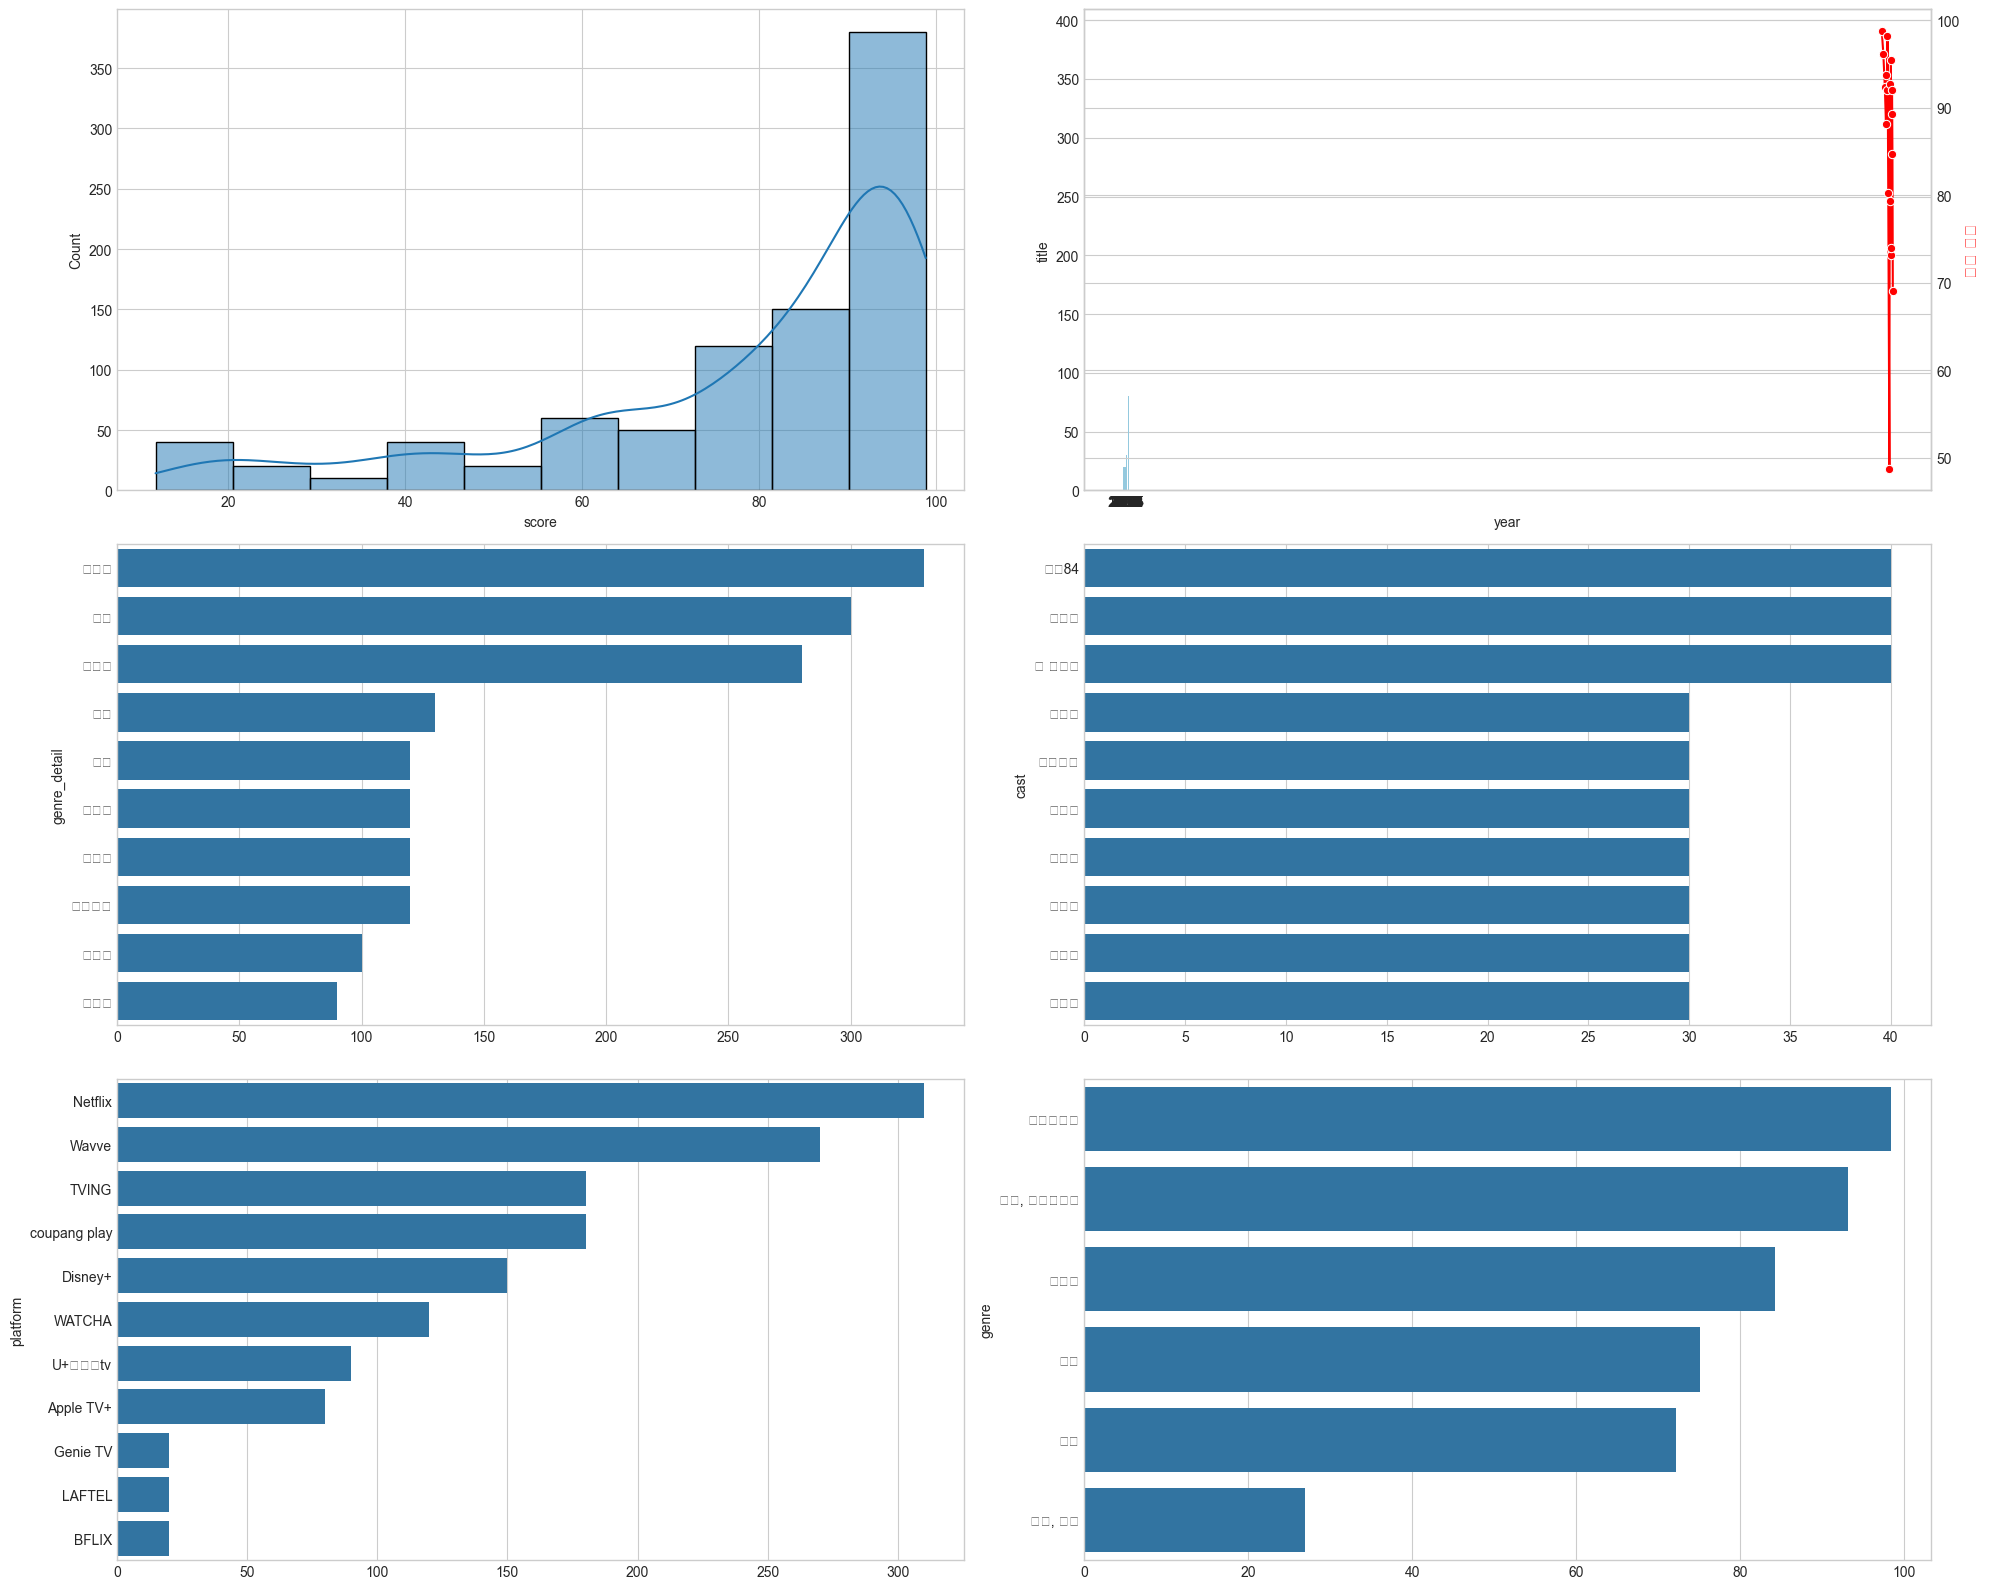

In [40]:
visualize_drama_data(combined_data, results)

d:\Users\main\AppData\Local\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.

d:\Users\main\AppData\Local\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 51313 (\N{HANGUL SYLLABLE JOG}) missing from font(s) Arial.

d:\Users\main\AppData\Local\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) Arial.

d:\Users\main\AppData\Local\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) Arial.

d:\Users\main\AppData\Local\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) Arial.

d:\Users\main\AppData\Local\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 52272 (\N{HANGUL SYLLABLE CAL}) missing from font(s) Arial.

d:\Users\mai

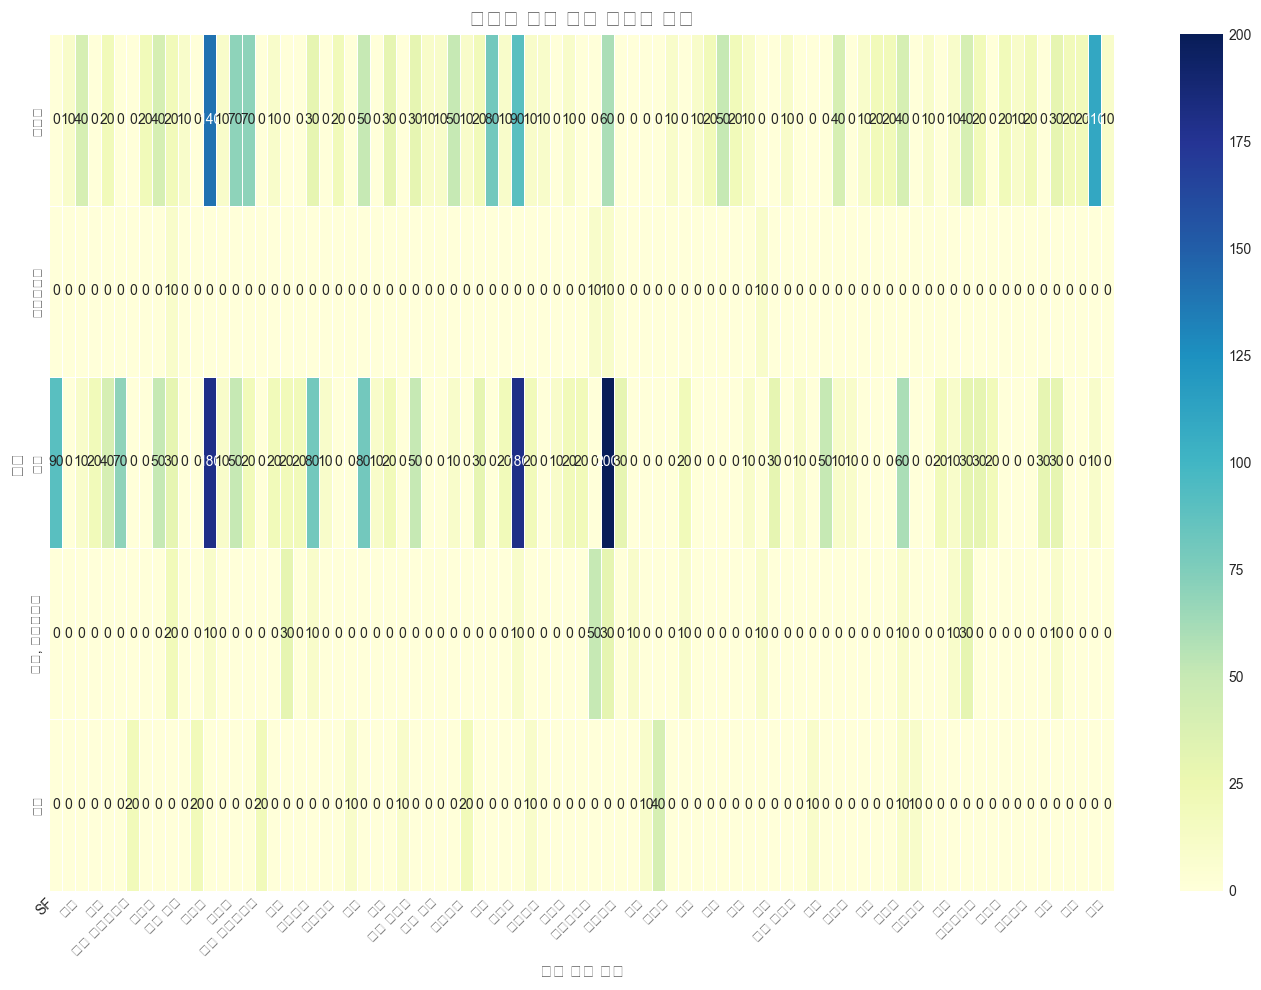

In [41]:
visualize_genre_relationships(results)

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\831295410.py:81: UserWarning:

Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\831295410.py:81: UserWarning:

Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\831295410.py:81: UserWarning:

Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\831295410.py:81: UserWarning:

Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\831295410.py:81: UserWarning:

Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\831295410.py:81: UserWarning:

Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\831295410.py:81: UserWarning:

Glyph 44036 (\N{HANGUL SYLLABLE 

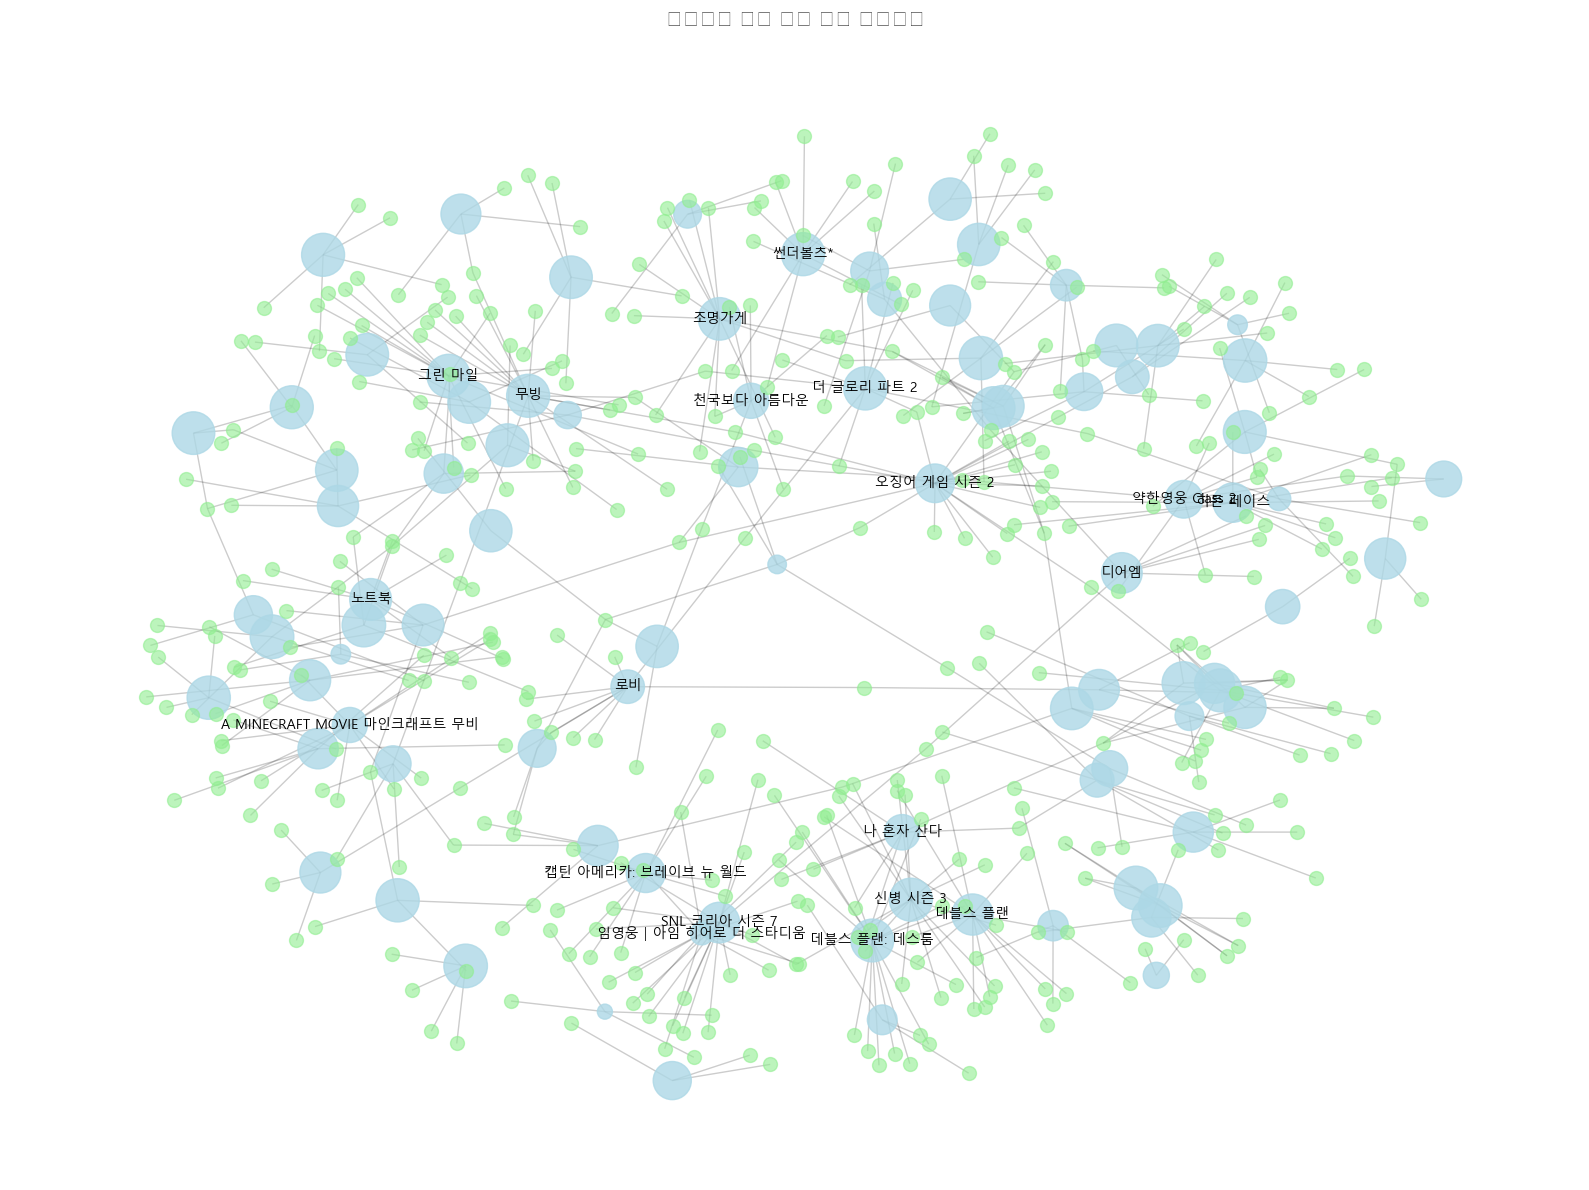

=== 네트워크 중심성 높은 상위 10개 노드 ===
오징어 게임 시즌 2 (work): 0.0671
마동석 (actor): 0.0332
거룩한 밤: 데몬 헌터스 (work): 0.0308
무빙 (work): 0.0285
강하늘 (actor): 0.0282
이다윗 (actor): 0.0278
더 글로리 파트 2 (work): 0.0260
당신의 맛 (work): 0.0246
범죄도시 2 (work): 0.0245
로비 (work): 0.0244


In [42]:
visualize_actor_network(results)

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\3602262547.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\3602262547.py:74: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\3602262547.py:90: UserWarning:

Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\3602262547.py:90: UserWarning:

Glyph 51137 (\N{HANGUL SYLLABLE JAENG}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\3602262547.py:90: UserWarning:

Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) Arial.

C:\Users\dh107\AppData\Local\Temp\ipykernel_25140\3602262547.py:90: UserWarning:

Glyph 52632 (\N

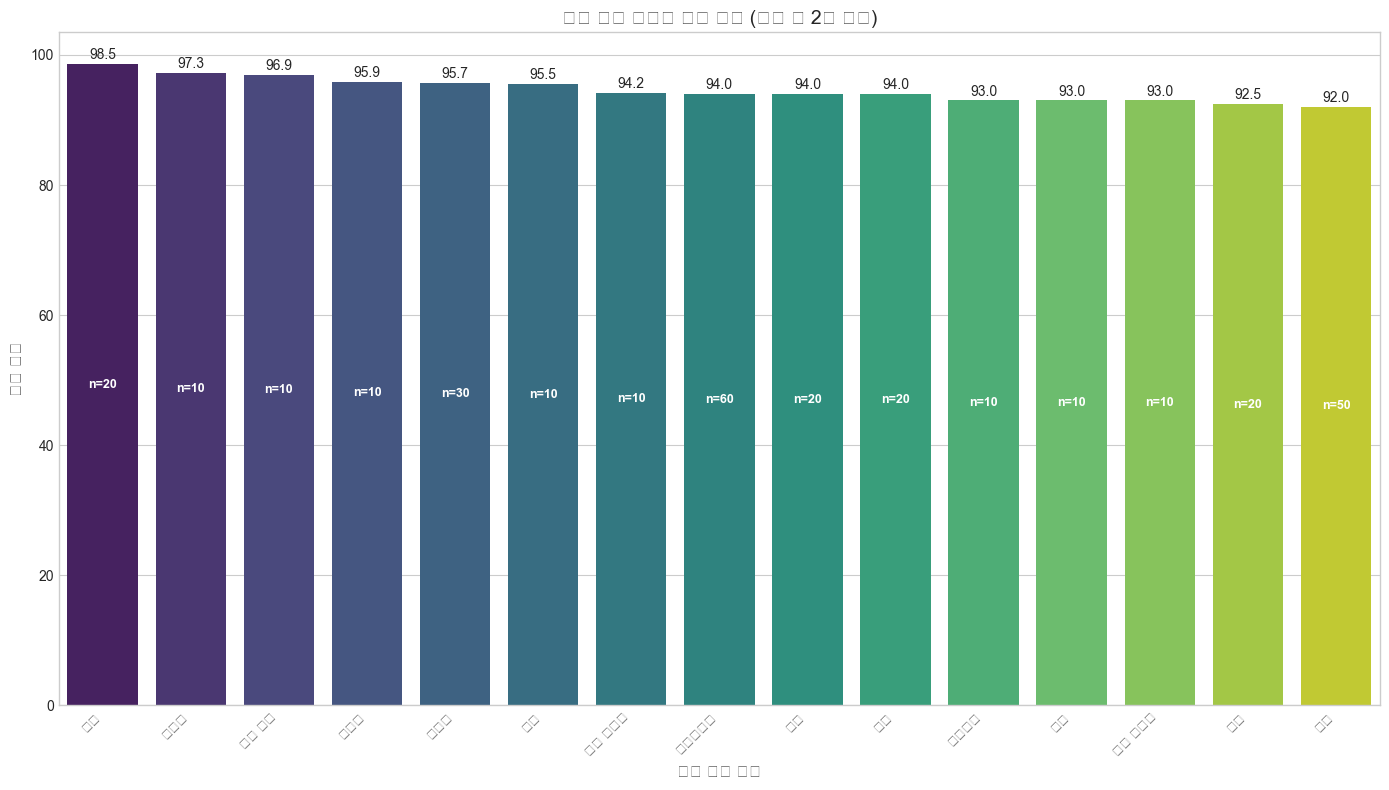

In [43]:
visualize_genre_detail_scores(results)